In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

1. 데이터셋 확인 - Null data가 존재할 수 있음, 확인 후 수정
2. EDA - 여러 Feature들을 개별적으로 분석하고, feature들 간의 상관관계를 확인한다.
        여러 시각화 툴을 사용하여 insight를 획득
3. Feature Engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering 함.
        - One hot Encoding, Class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등
4. Model 만들기 - sklearn을 사용해 모델을 만든다.
5. 모델 학습 및 예측 - train set을 가지고 모델을 학습시킨 후, testset을 가지고 prediction함.
6. 모델 평가 - 예측 성능이 원하는 수준인지 판단. 문제에 따라 평가하는 방식도 달라져야함.

## 1. Dataset 확인

In [2]:
df_train=pd.read_csv('./data/train.csv')
df_test=pd.read_csv('./data/test.csv')

우리가 다루는 문제에서 Feature은 Pclass, Age, SibSp, Parch, Fare이며, 예측하려는 target label은 Survived임.
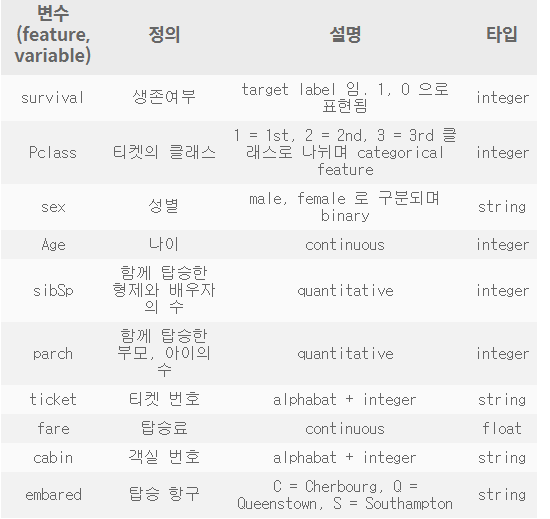

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


describe에서 보시다싶이 PassenserID 숫자와 다른, 즉 Null data가 존재하는 Feature가 있음을 알 수 있다

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
# {:>10} 우측으로 10칸 띄우기, shape[0] : 행의 갯수 반환, shape[1] : 열의 갯수 반환
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 
    100 * (df_train[col].isnull().sum()/df_train[col].shape[0])) 
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 
    100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:     Pclass	 Percent of NaN value: 0.00%
columns:       Name	 Percent of NaN value: 0.00%
columns:        Sex	 Percent of NaN value: 0.00%
columns:        Age	 Percent of NaN value: 20.57%
columns:      SibSp	 Percent of NaN value: 0.00%
columns:      Parch	 Percent of NaN value: 0.00%
columns:     Ticket	 Percent of NaN value: 0.00%
columns:       Fare	 Percent of NaN value: 0.24%
columns:      Cabin	 Percent of NaN value: 78.23%
columns:   Embarked	 Percent of NaN value: 0.00%


두 데이터에서 Age, Cabin이 Null data가 꽤 되는 것을 관찰할 수 있었다
- 시각화 시켜보자

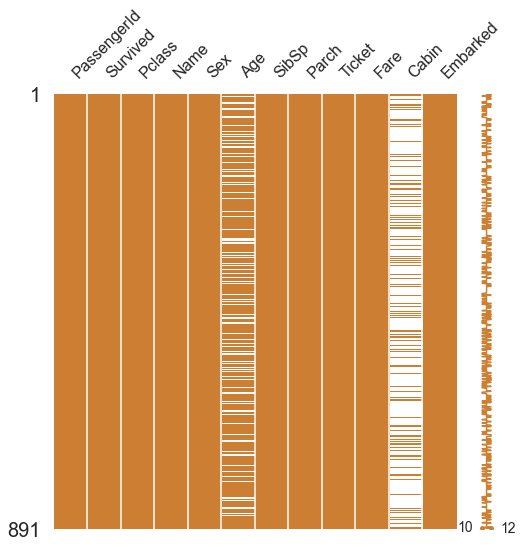

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

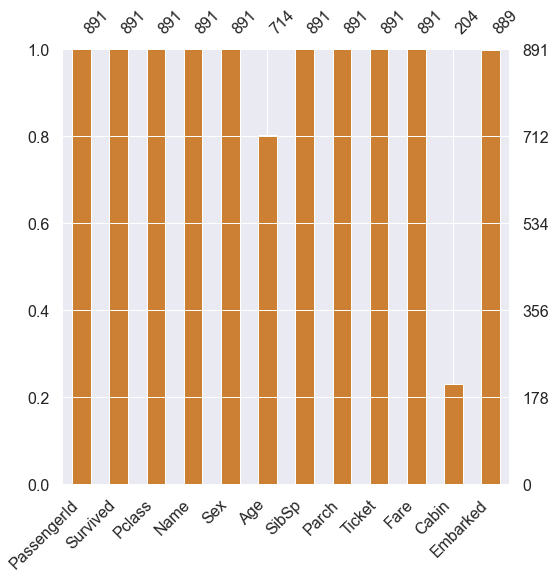

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
plt.show()

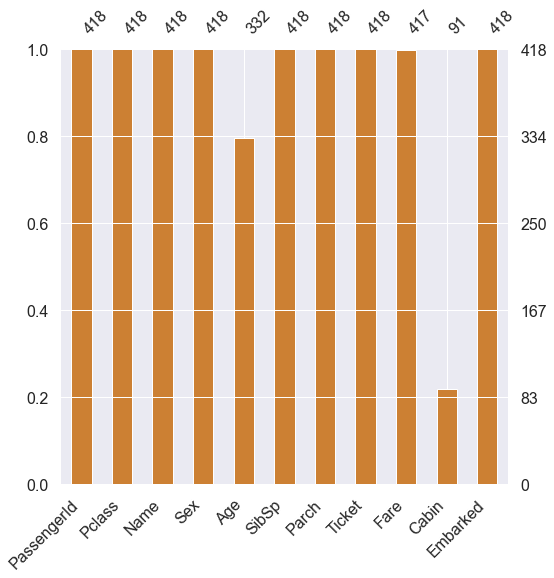

In [10]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
plt.show()

## 1.2 Target label 확인

In [11]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

38.4%가 살아남았음.
target label의 분포가 제법 균일함. 불균일할 경우, 100개 중 1이 99, 0이 1개인 경우 만약 모델이 모든 것을 1이라고 해도 정확도가 99%이지만, 

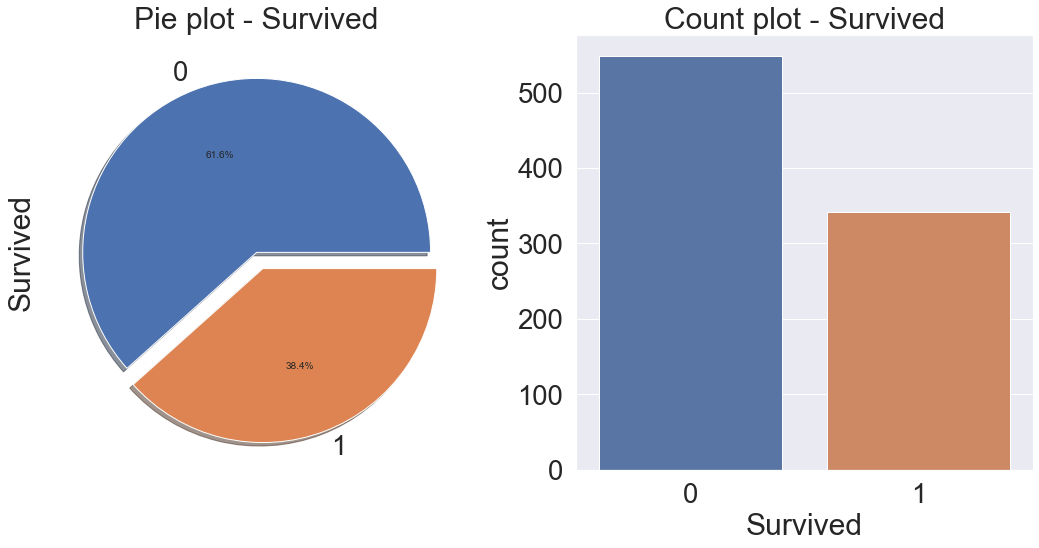

In [12]:
# f가 figure 전체, ax가 리스트로 각 액자를 하나씩 담고 있다. 

f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
# ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## 2. EDA

PClass별 Survived를 판단할 사람의 수

In [13]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


PClass별 Survived한 사람의 수

In [14]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
# margin은 ALL 추가
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(
cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


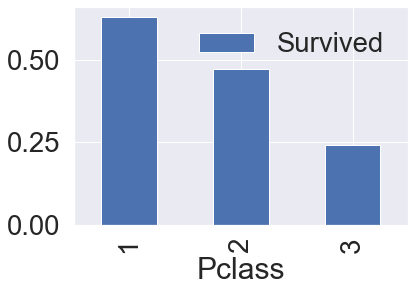

In [16]:
# PClass에 따른 생존률 분포도 PClass가 높을 수록(1st) 생존률이 높은 것을 확인할 수 있었다.
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived'
,ascending=False).plot.bar()

Pclass가 높을 수록 생존에 유리함을 알 수 있었다. 

나중에 모델을 세울 때 이 Feature를 사용하는 것이 좋을 것이라 판단할 수 있음.

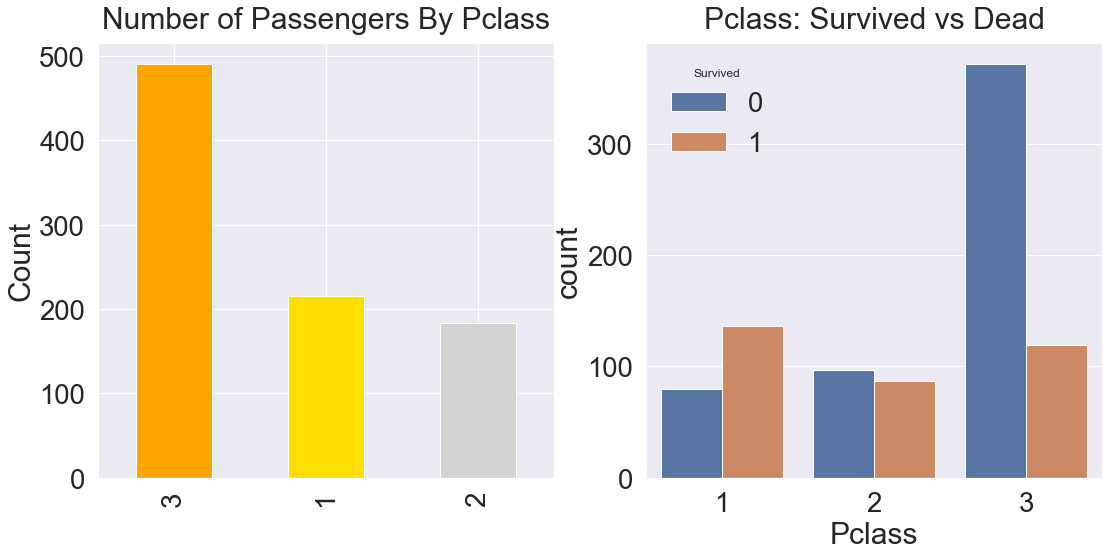

In [17]:
y_position = 1.02 #title 글자의 위치
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(color = ['orange', '#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y= y_position)
plt.show()

이번에는 성별로 생존률이 어떻게 달라지는 지 확인해보겠다.
- 여성이 생존할 확률이 현저하게 높음

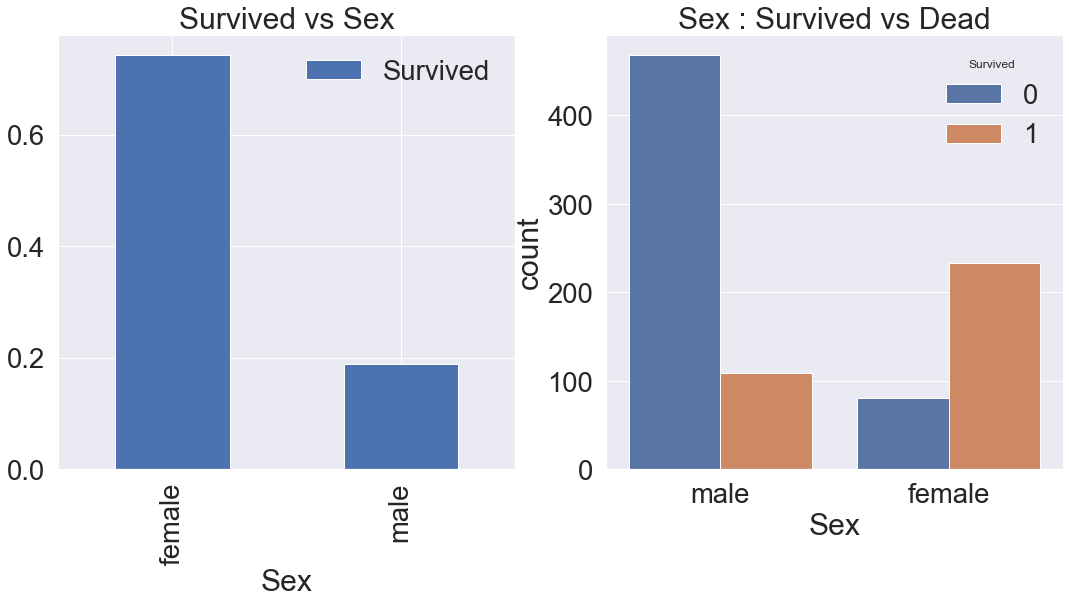

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

In [19]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by = 'Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


Sex도 생존율에 지대한 영향을 끼침을 알 수 있음

In [20]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


이번에는 Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인해보자

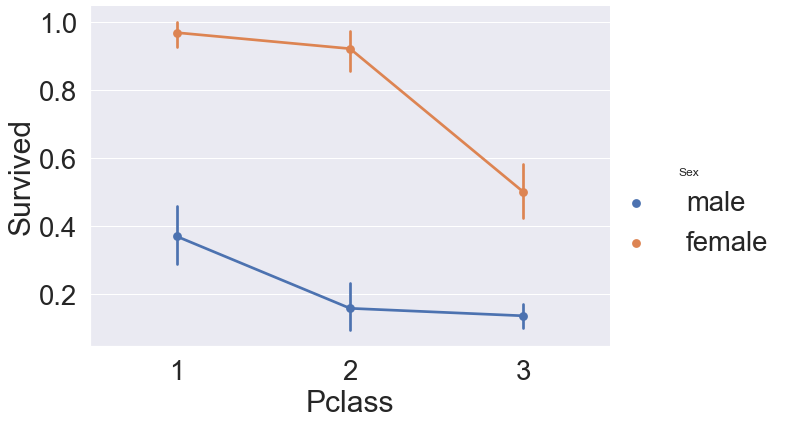

In [21]:
sns.factorplot('Pclass','Survived', hue ="Sex", data = df_train, size =6, aspect=1.5)

모든 클래스에서 feamle의 생존확률이 male보다 높음
또한 남녀 상관없이 클래스가 높을 수록 살 확률이 높다.
위 그래프를 hue대신 column으로 하면 아래와 같아짐

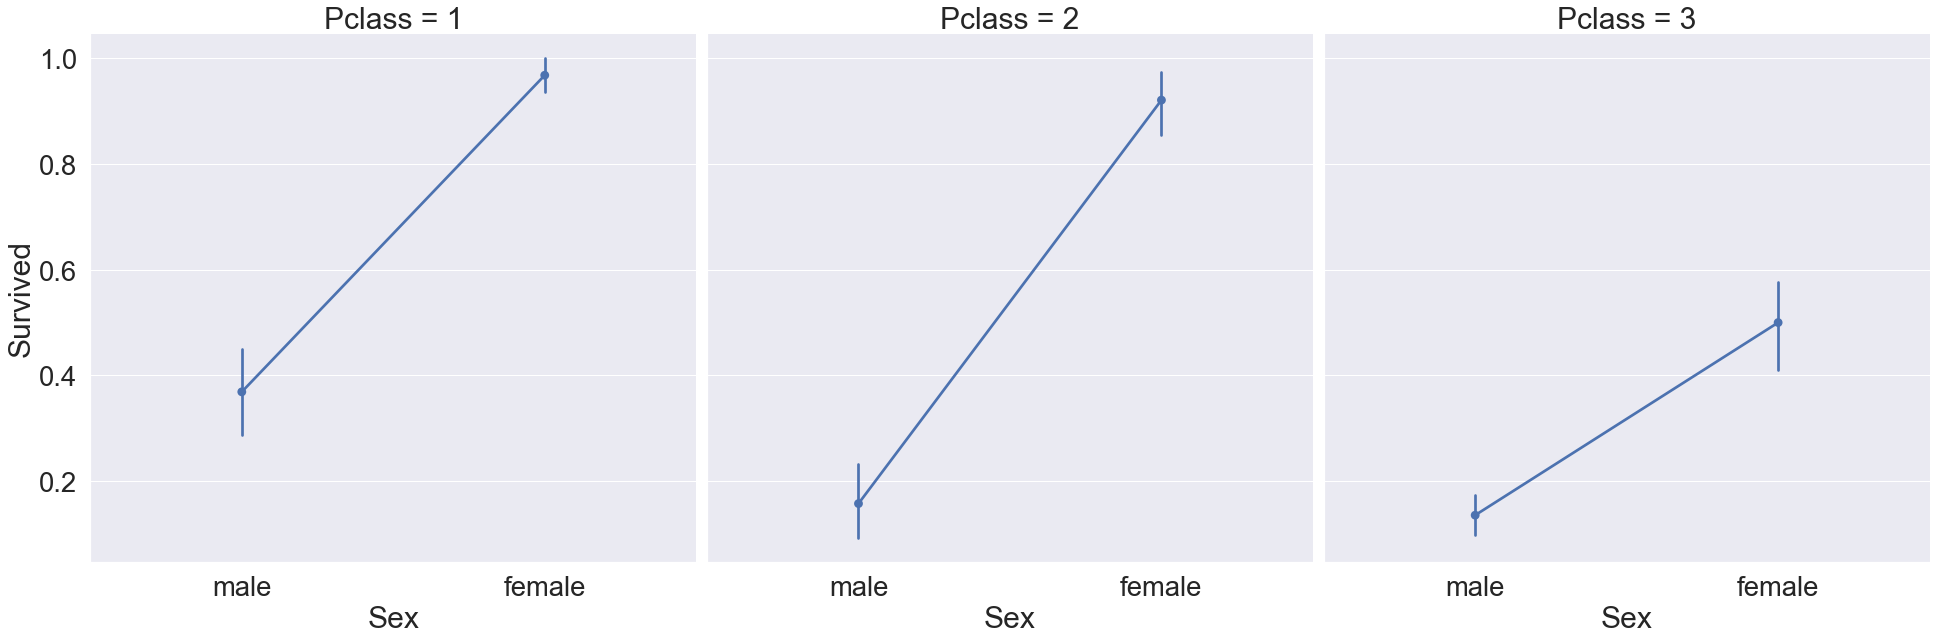

In [22]:
sns.factorplot(x='Sex',y='Survived', col ="Pclass", data = df_train, satureation =.5,
               size =9, aspect=1)

Age를 살펴보자

In [23]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


생존에 따른 Age의 histogram
- 생존자 중 나이가 어린 경우가 많음을 알 수 있다.

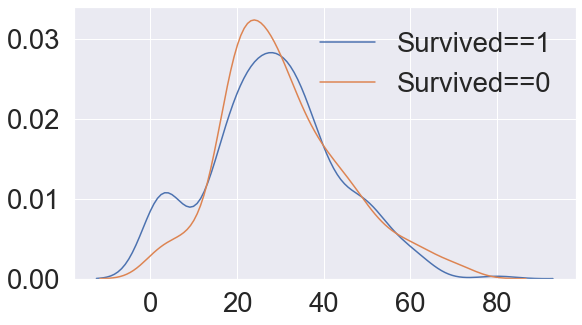

In [24]:
f, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax = ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

클래스가 높을 수록 나이 많은 사람의 비중이 커진다
나이대가 변하면서 생존률이 어떻게 되는지 보려고 한다.
나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 지켜보자

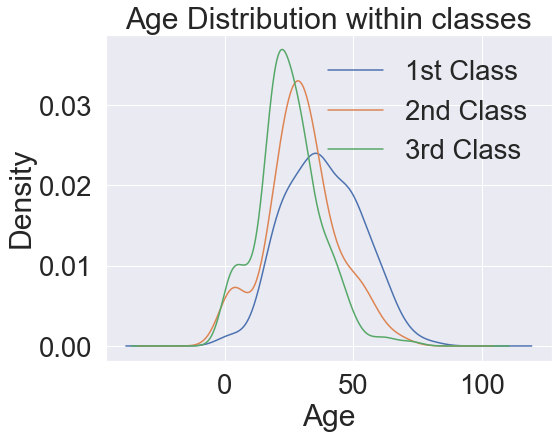

In [25]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass']==2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass']==3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

plt.show()

나이가 어릴 수록 생존률이 확실히 높음
- 중요한 feature로 쓰일 것

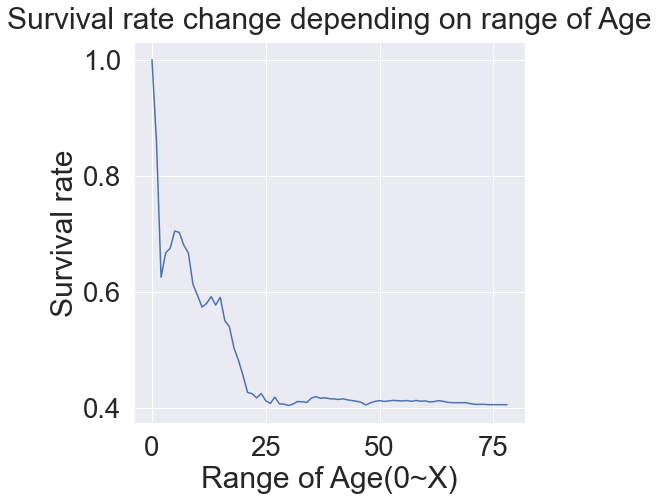

In [26]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/
                                    len(df_train[df_train['Age']<i]['Survived']))
                                    
plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~X)')
plt.show()